In [7]:
from data_processing import *
from financial_analysis import *
from plotting_functions import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import json
with open('data/BTAUSD.json') as file:
    dico = json.load(file)
dico

In [34]:
trades = pd.read_csv('data/BTAUSD_trades.csv')
trades['ts_ms'] = pd.to_datetime(trades['ts_ms'], unit='ms')
trades = trades.set_index('ts_ms').sort_index()
trades = trades.drop(columns=['trade_id', 'lhs_ccy', 'rhs_ccy'])
trades


,side,size,px
ts_ms,,,
2023-04-30 23:02:12.275000064,B,3000.0,4.199725
2023-04-30 23:02:12.350000128,B,2000.0,4.199715
2023-04-30 23:04:08.150000128,S,2000.0,4.199705
2023-04-30 23:04:15.249999872,S,8000.0,4.199815
2023-04-30 23:11:17.424999936,B,7000.0,4.200025
...,...,...,...
2023-05-02 22:55:55.750000128,B,3000.0,4.212305
2023-05-02 22:56:55.224999936,B,10000.0,4.212085
2023-05-02 22:57:58.375000064,B,10000.0,4.211785


<Axes: xlabel='ts_ms'>

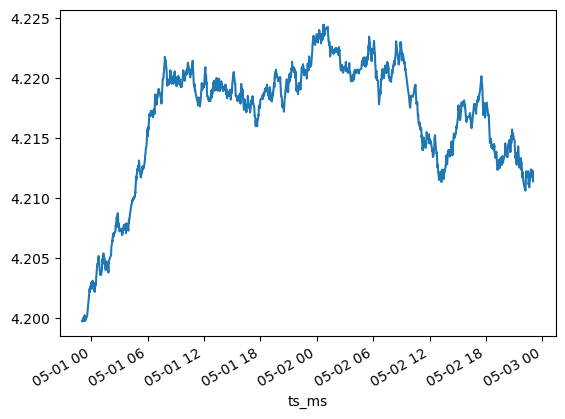

In [33]:
trades.px.plot()

In [28]:
trades.merge(data, on='ts_ms', how='left')

,trade_id,side,size,px,lhs_ccy,rhs_ccy,bid,ask
ts_ms,,,,,,,,
2023-05-02 20:02:20.424999936,2751,B,4000.0,4.214545,BTA,USD,NaN,NaN
2023-05-01 02:37:34.150000128,208,S,7000.0,4.207605,BTA,USD,NaN,NaN
2023-05-02 16:17:03.575000064,2521,S,10000.0,4.217045,BTA,USD,NaN,NaN
2023-05-01 11:00:07.049999872,711,B,4000.0,4.219295,BTA,USD,NaN,NaN
2023-05-02 11:49:08.524999936,2288,B,1000.0,4.214975,BTA,USD,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-05-01 13:24:23.775000064,870,B,3000.0,4.219605,BTA,USD,NaN,NaN
2023-05-01 01:12:21.124999936,125,S,2000.0,4.204785,BTA,USD,NaN,NaN
2023-05-01 12:47:18.350000128,812,S,4000.0,4.218675,BTA,USD,NaN,NaN


In [23]:
data = pd.read_csv('data/BTAUSD_md.csv')
data['ts_ms'] = pd.to_datetime(data['ts_ms'], unit='ms')
data = data.set_index('ts_ms')
data

,bid,ask
ts_ms,,
2023-04-30 23:00:00.000,4.199900,4.200100
2023-04-30 23:00:00.100,4.199805,4.200185
2023-04-30 23:00:00.200,4.199795,4.200175
2023-04-30 23:00:00.300,4.199775,4.200155
2023-04-30 23:00:00.400,4.199775,4.200155
...,...,...
2023-05-02 22:59:59.500,4.211415,4.211795
2023-05-02 22:59:59.600,4.211415,4.211795
2023-05-02 22:59:59.700,4.211415,4.211795


<Axes: xlabel='ts_ms'>

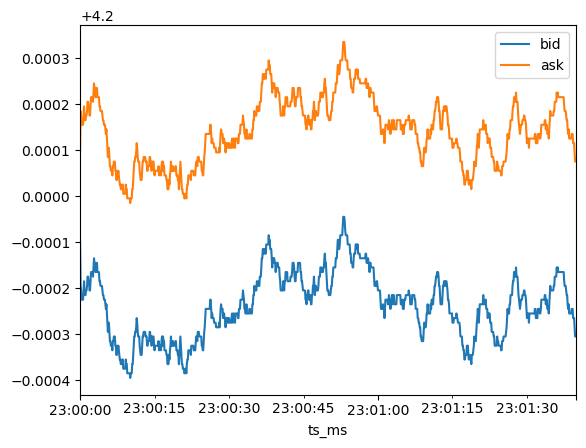

In [31]:
data.head(1000).plot()

In [47]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

start_time = '2023-04-30 23:00:00'
end_time   = '2023-05-02 23:55:00'

data_period = data.loc[start_time:end_time]
trades_period = trades.loc[start_time:end_time]

buy_trades = trades_period[trades_period['side'] == 'B']
sell_trades = trades_period[trades_period['side'] == 'S']

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(x=data_period.index, y=data_period['bid'], name="Bid", line=dict(color='green')), secondary_y=False)
fig.add_trace(go.Scatter(x=data_period.index, y=data_period['ask'], name="Ask", line=dict(color='red')), secondary_y=False)

fig.add_trace(go.Scatter(x=buy_trades.index,  y=buy_trades['px'],  mode='markers', name="Buy Trades",  marker=dict(color='blue', size=10, symbol='triangle-up')),    secondary_y=True)
fig.add_trace(go.Scatter(x=sell_trades.index, y=sell_trades['px'], mode='markers', name="Sell Trades", marker=dict(color='black', size=10, symbol='triangle-down')), secondary_y=True)

fig.update_layout(title_text="Interactive Market Data and Trades for BTAUSD", xaxis_title="Time", yaxis_title="Price")

fig.update_yaxes(title_text="Price", secondary_y=False)

fig.update_layout(xaxis_rangeslider_visible=False)  
fig.update_xaxes(rangeselector=dict(
    buttons=list([
        dict(count=15, label="15m", step="minute", stepmode="backward"),
        dict(count=45, label="45m", step="minute", stepmode="backward"),
        dict(count=1, label="1h", step="hour", stepmode="backward"),
        dict(count=3, label="3h", step="hour", stepmode="backward"),
        dict(step="all")
    ])
))

fig.show()
